<a href="https://colab.research.google.com/github/CamTu22/DAOTHICAMTU_20104009/blob/main/Nh%E1%BA%ADn_di%E1%BB%87n_m%C3%B3n_%C4%83n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.utils import validation
from keras.preprocessing.image import ImageDataGenerator
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/BTVN_nhan_dien/Food/

/content/drive/MyDrive/Colab Notebooks/BTVN_nhan_dien/Food


In [3]:
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN_nhan_dien/Food/Train',target_size=(300,300), batch_size=32, class_mode='categorical')

Found 440 images belonging to 10 classes.


In [5]:
test_set = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN_nhan_dien/Food/Test',target_size=(300,300), batch_size=32, class_mode='categorical')

Found 276 images belonging to 10 classes.


In [6]:
train_set.class_indices

{'banh bot loc': 0,
 'banh chung': 1,
 'banh da lon': 2,
 'banh khot': 3,
 'banh mi': 4,
 'banh tai heo': 5,
 'banh trung thu': 6,
 'banh xeo': 7,
 'com tam': 8,
 'pho': 9}

In [7]:
test_set.class_indices

{'banh bot loc': 0,
 'banh chung': 1,
 'banh da lon': 2,
 'banh khot': 3,
 'banh mi': 4,
 'banh tai heo': 5,
 'banh trung thu': 6,
 'banh xeo': 7,
 'com tam': 8,
 'pho': 9}

In [8]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 300, 300, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                    

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_set,epochs=100,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/100
14/14 [==============================] - 67s 5s/step - loss: 13.5189 - accuracy: 0.1068 - val_loss: 2.1492 - val_accuracy: 0.1304
Epoch 2/100
14/14 [==============================] - 22s 2s/step - loss: 2.1354 - accuracy: 0.1636 - val_loss: 2.1384 - val_accuracy: 0.1775
Epoch 3/100
14/14 [==============================] - 23s 2s/step - loss: 2.0171 - accuracy: 0.2159 - val_loss: 2.0235 - val_accuracy: 0.2319
Epoch 4/100
14/14 [==============================] - 22s 2s/step - loss: 1.8606 - accuracy: 0.2886 - val_loss: 2.0216 - val_accuracy: 0.2971
Epoch 5/100
14/14 [==============================] - 22s 2s/step - loss: 1.8389 - accuracy: 0.3205 - val_loss: 1.8075 - val_accuracy: 0.3333
Epoch 6/100
14/14 [==============================] - 22s 2s/step - loss: 1.8103 - accuracy: 0.3455 - val_loss: 1.8340 - val_accuracy: 0.3478
Epoch 7/100
14/14 [==============================] - 22s 2s/step - loss: 1.6400 - accuracy: 0.4000 - val_loss: 1.6824 - val_accuracy: 0.4239
Epoch 8/100


In [ ]:
model.save('mon_an.h5')

In [9]:
model_ma = load_model('mon_an.h5')

1/1 [==============================] - 0s 162ms/step
Cơm tấm


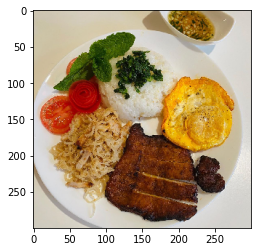

1/1 [==============================] - 0s 171ms/step
Bánh bột lộc


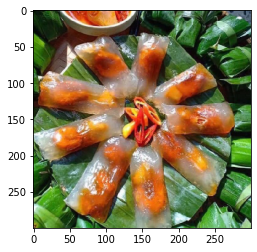

1/1 [==============================] - 0s 157ms/step
Bánh da lợn


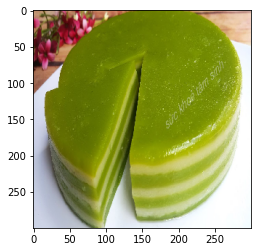

1/1 [==============================] - 0s 157ms/step
Bánh khọt


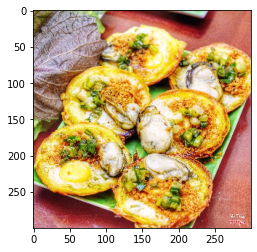

1/1 [==============================] - 0s 159ms/step
Bánh tai heo


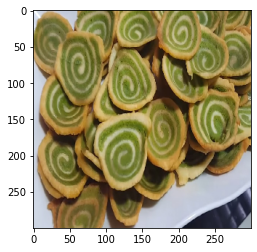

1/1 [==============================] - 0s 159ms/step
Bánh trung thu


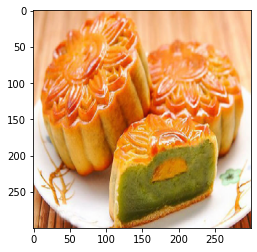

1/1 [==============================] - 0s 168ms/step
Bánh xèo


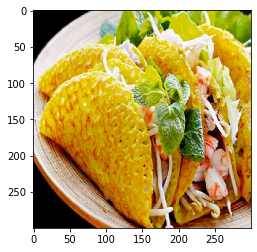

1/1 [==============================] - 0s 161ms/step
Bánh chưng


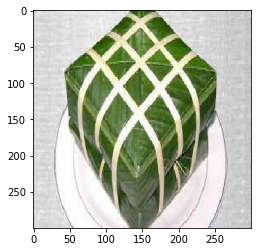

1/1 [==============================] - 0s 158ms/step
Phở


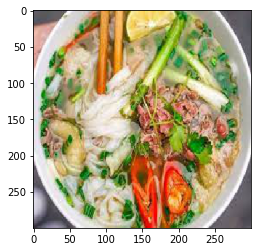

In [16]:
test='/content/drive/MyDrive/Colab Notebooks/BTVN_nhan_dien/Food/nhandang'
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(300,300))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_ma.predict(img)
  if round(result[0][0])==1:
    prediction='Bánh bột lộc'
  if round(result[0][1])==1:
    prediction = 'Bánh chưng'
  if round(result[0][2])==1:
    prediction='Bánh da lợn'
  if round(result[0][3])==1:
    prediction='Bánh khọt'
  if round(result[0][4])==1:
    prediction='Bánh mì'
  if round(result[0][5])==1:
    prediction='Bánh tai heo'
  if round(result[0][6])==1:
    prediction='Bánh trung thu'
  if round(result[0][7])==1:
    prediction='Bánh xèo'
  if round(result[0][8])==1:
    prediction='Cơm tấm'
  if round(result[0][9])==1:
    prediction='Phở'
  print(prediction)
  plt.show()